In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import os
import DataLoad
import ImagePreprocessor
import Labeling
import TrajectoryPhy
import ReadParam
import DataAnalysis

In [4]:
report = './result/eval_whole_all.csv'

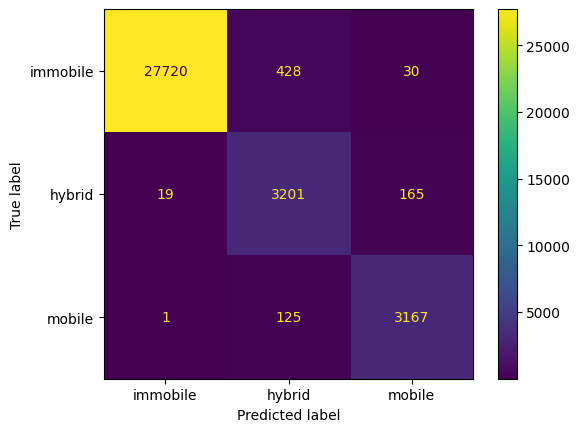

In [5]:
DataAnalysis.confusion_matrix(report)

In [ ]:
print(DataAnalysis.ratio_calcul(report))
DataAnalysis.cell_class_map(report)
DataAnalysis.cell_radius_map(report)

In [18]:
max_rs_immobile = np.array(list([float(x['maximum_radius']) for x in data if x['class_id']=='0']))
max_rs_hybrid = np.array(list([float(x['maximum_radius']) for x in data if x['class_id']=='1']))
max_rs_mobile = np.array(list([float(x['maximum_radius']) for x in data if x['class_id']=='2']))

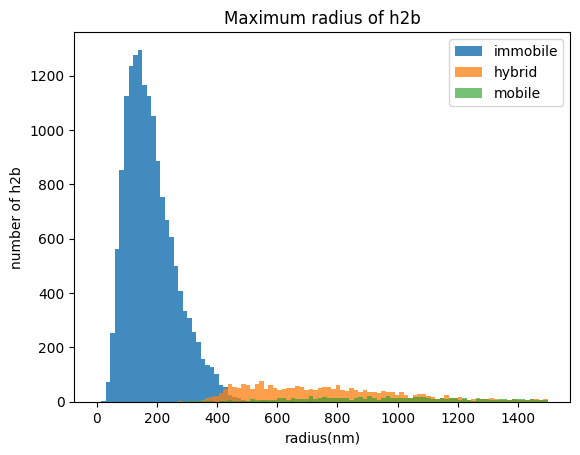

0.17991035807388941


In [19]:
plt.figure()
plt.title('Maximum radius of h2b')
plt.hist(max_rs_immobile*1000, range = (0, 1500), bins = 100, alpha=0.85, label='immobile')
plt.hist(max_rs_hybrid*1000, range = (0, 1500), bins = 100, alpha=0.75, label='hybrid')
plt.hist(max_rs_mobile*1000, range = (0, 1500), bins = 100, alpha=0.65, label='mobile')
plt.xlabel('radius(nm)')
plt.ylabel('number of h2b')
plt.legend()
plt.show()
print(np.mean(max_rs_immobile))

In [2]:
data_path = './data/TrainingSample'
print(f'Loading the data...')
histones = DataLoad.read_files(path=data_path, cutoff=10, chunk=False)
histones_label = Labeling.make_label(histones, radius=0.45, density=0.4)

print(f'Image processing...')
ImagePreprocessor.make_channel(histones, immobile_cutoff=0.3, hybrid_cutoff=10, nChannel=3)
histones_imgs, img_size, time_scale = \
    ImagePreprocessor.preprocessing(histones, img_scale=10, amp=2)

print(f'Making imgs...')
zoomed_imgs, scaled_size = ImagePreprocessor.zoom(histones_imgs, size=img_size, to_size=(500, 500))

reshaped_label = []
reshaped_imgs = []
for histone in zoomed_imgs:
    reshaped_imgs.append(zoomed_imgs[histone].reshape(-1))
    reshaped_label.append(histones_label[histone])
reshaped_imgs = np.array(reshaped_imgs)
print(reshaped_imgs.shape)

reducer = umap.UMAP(n_neighbors=5)
embedding = reducer.fit_transform(reshaped_imgs)
print(f'Data reducing end')

Loading the data...
Image processing...
Making imgs...
(2400, 750000)
Data reducing end


(2400, 2)


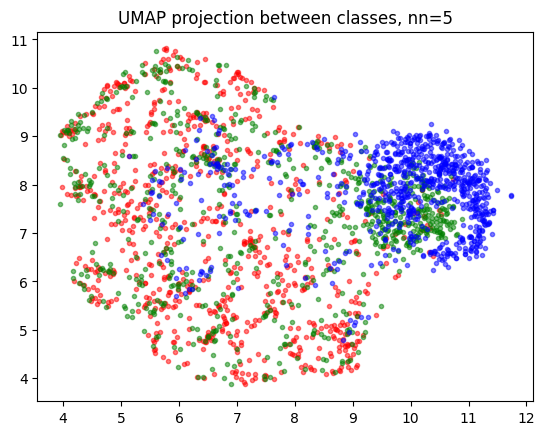

In [3]:
print(embedding.shape)  
color_vec = []
for i in range(len(reshaped_label)):
    if reshaped_label[i] == 0:
        color_vec.append('red')
    elif reshaped_label[i] == 1:
        color_vec.append('green')
    else:
        color_vec.append('blue')
        
fig, ax = plt.subplots()
for p in range(reshaped_imgs.shape[0]):
    ax.scatter(
        embedding[p][0],
        embedding[p][1],
        color=color_vec[p],
        alpha=0.5,
        s=9
    )
plt.title(f'UMAP projection between classes, nn=5', fontsize=12)
plt.savefig(f'img/training_imgs/1.png')

(0.8361581920903954, 0.07909604519774012, 0.0847457627118644)

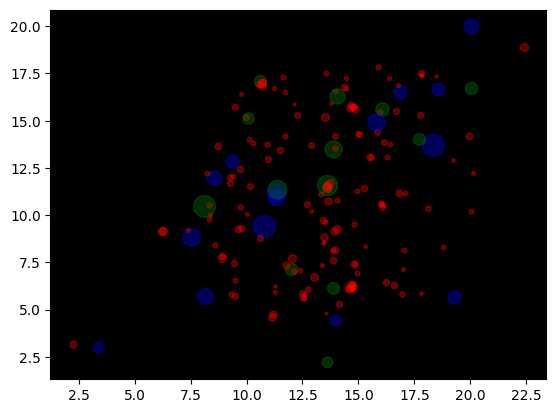

In [9]:
report_path = 'result/scratch1.csv'
header, data = DataLoad.read_report(report_path)
cell_class_map(data, [0,1,2])
ratio_calcul(data)

1.7949426614764639


(0.8058984910836763, 0.03429355281207133, 0.1598079561042524)

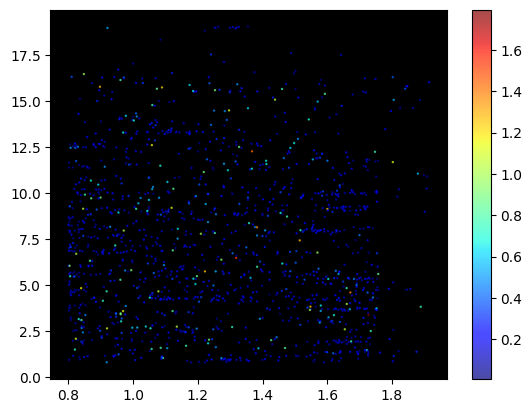

In [29]:
report_path = 'result/5min/all.csv'
header, data = DataLoad.read_report(report_path)
cell_radius_map(data, [0,1,2])
ratio_calcul(data)

(0.7368421052631579, 0.07518796992481203, 0.18796992481203006)

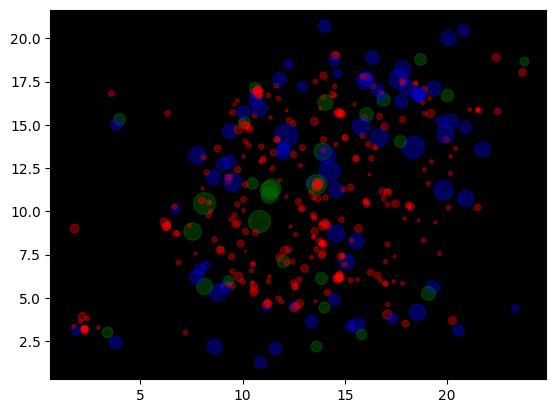

In [9]:
report_path = 'result/report.csv'
header, data = DataLoad.read_report(report_path)
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.803921568627451, 0.10784313725490197, 0.08823529411764706)

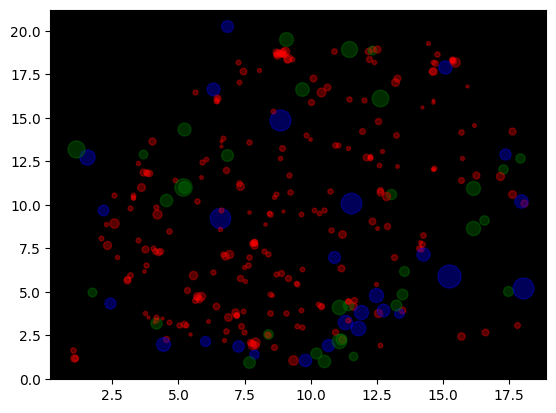

In [10]:
report_path = 'result/scratch3.csv'
header, data = DataLoad.read_report(report_path)
cell_class_map(data, [0,1,2])
ratio_calcul(data)

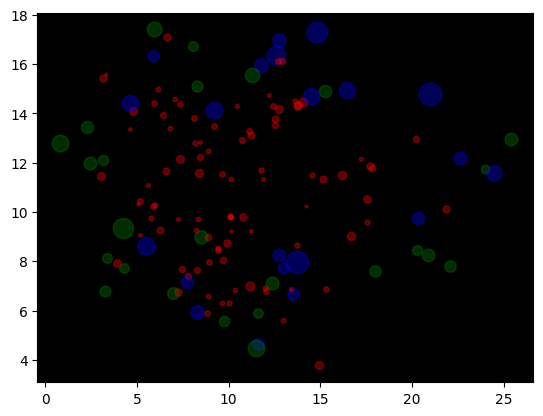

In [11]:
report_path = 'result/scratch4.csv'
header, data = DataLoad.read_report(report_path)
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.7701863354037267, 0.13043478260869565, 0.09937888198757763)

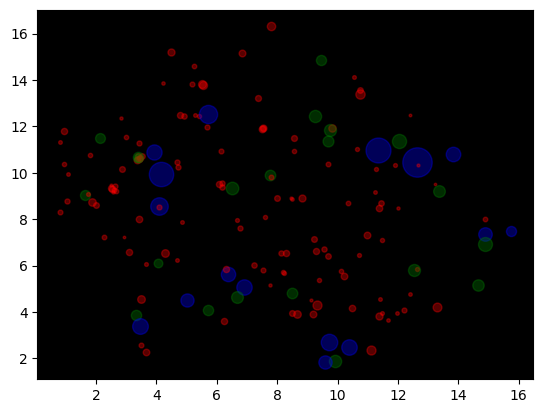

In [12]:
report_path = 'result/scratch5.csv'
header, data = DataLoad.read_report(report_path)
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.8407079646017699, 0.07964601769911504, 0.07964601769911504)

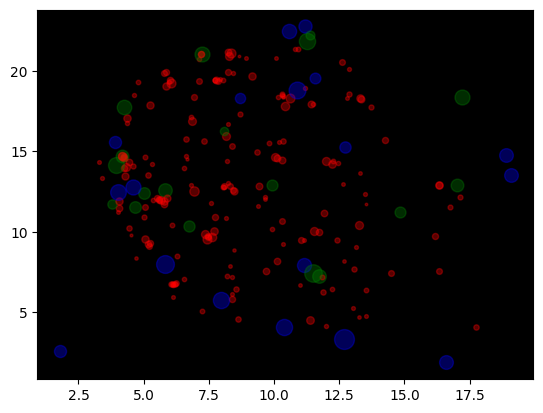

In [11]:
report_path = 'result/scratch6.csv'
header, data = DataLoad.read_report(report_path)
cell_class_map(data, [0,1,2])
ratio_calcul(data)

Loading the data...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


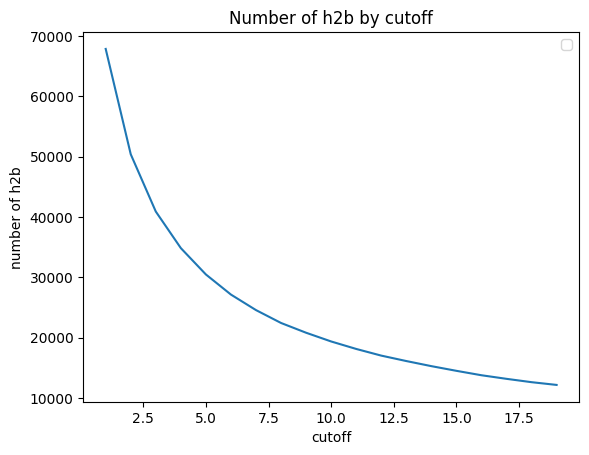

In [16]:
print(f'Loading the data...')
data_path = 'data/1_WT-H2BHalo_noIR/whole cells/Concatenation_20220217_20220301_20220601_H2B_Halo_before_entire_Cell'
params = ReadParam.read('.')
nn = []
for co in range(1,20):
    histones = DataLoad.read_files(path=data_path, cutoff=co, group_size=params['group_size'])
    a = {}
    for hist in histones:
        a |= hist
    nn.append(len(a))
plt.figure()
plt.title('Number of h2b by cutoff')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], nn)
plt.xlabel('cutoff')
plt.ylabel('number of h2b')
plt.legend()
plt.show()

In [4]:
report_path = ['./result/before/all.csv',
               './result/15s/all.csv',
               './result/30s/all.csv',
               './result/1min/all.csv',
               './result/2min/all.csv',
               './result/5min/all.csv']

for rp in report_path:
    header, data = DataLoad.read_report(rp)
    print(ratio_calcul(data))

(0.8459935593862474, 0.028225042621708656, 0.12578139799204394)
(0.828101644245142, 0.04833084205281515, 0.12356751370204284)
(0.846800731261426, 0.030347349177330896, 0.12285191956124314)
(0.8487758041286606, 0.03264522323571772, 0.1185789726356217)
(0.8238238238238238, 0.046546546546546545, 0.12962962962962962)
(0.8058984910836763, 0.03429355281207133, 0.1598079561042524)


In [5]:
report_path = ['./result/before/all.csv',
               './result/15s/all.csv',
               './result/30s/all.csv',
               './result/1min/all.csv',
               './result/2min/all.csv',
               './result/5min/all.csv']

for rp in report_path:
    header, data = DataLoad.read_report(rp)
    print(ratio_calcul(data))

(0.892083497439937, 0.06144151240645924, 0.04647499015360378)
(0.8458100558659218, 0.09720670391061452, 0.05698324022346369)
(0.8752455795677799, 0.07269155206286837, 0.05206286836935167)
(0.8701923076923077, 0.08173076923076923, 0.04807692307692308)
(0.8372844827586207, 0.09159482758620689, 0.07112068965517242)
(0.855457227138643, 0.08112094395280237, 0.06342182890855458)


In [7]:
report_path = ['./result/before/20220603_H2B HALO_no_Olaparib_Field3_before_110ms-crop.csv',
               './result/15s/20220603_H2B HALO_no_Olaparib_Field3_during-crop.csv', 
               './result/1min/20220603_H2B HALO_no_Olaparib_Field3_1min-crop.csv',
               './result/2min/20220603_H2B HALO_no_Olaparib_Field3_2min-crop.csv',
               './result/5min/20220603_H2B HALO_no_Olaparib_Field3_5min-crop.csv']

for rp in report_path:
    header, data = DataLoad.read_report(rp)
    print(ratio_calcul(data))

(0.8095238095238095, 0.011904761904761904, 0.17857142857142858)
(0.7831325301204819, 0.060240963855421686, 0.1566265060240964)
(0.559322033898305, 0.06779661016949153, 0.3728813559322034)
(0.6037735849056604, 0.07547169811320754, 0.32075471698113206)
(0.4025974025974026, 0.09090909090909091, 0.5064935064935064)


In [9]:
files = os.listdir('./result/before')
for file in files:
    if '.csv' in file:
        header, data = DataLoad.read_report(f'./result/before/{file}')
        print(ratio_calcul(data))

(0.7297297297297297, 0.05405405405405406, 0.21621621621621623)
(0.8333333333333334, 0.016666666666666666, 0.15)
(0.9029126213592233, 0.019417475728155338, 0.07766990291262135)
(0.9629629629629629, 0.0, 0.037037037037037035)
(0.8611111111111112, 0.013888888888888888, 0.125)
(0.7407407407407407, 0.024691358024691357, 0.2345679012345679)
(0.8529411764705882, 0.014705882352941176, 0.1323529411764706)
(0.9032258064516129, 0.010752688172043012, 0.08602150537634409)
(0.8828828828828829, 0.009009009009009009, 0.10810810810810811)
(0.8653846153846154, 0.03365384615384615, 0.10096153846153846)
(0.8043478260869565, 0.021739130434782608, 0.17391304347826086)
(0.8503401360544217, 0.027210884353741496, 0.12244897959183673)
(0.852112676056338, 0.02112676056338028, 0.1267605633802817)
(0.8028169014084507, 0.04225352112676056, 0.15492957746478872)
(0.6129032258064516, 0.03225806451612903, 0.3548387096774194)
(0.883495145631068, 0.019417475728155338, 0.0970873786407767)
(0.7507246376811594, 0.0463768115

(0.8459935593862474, 0.028225042621708656, 0.12578139799204394)

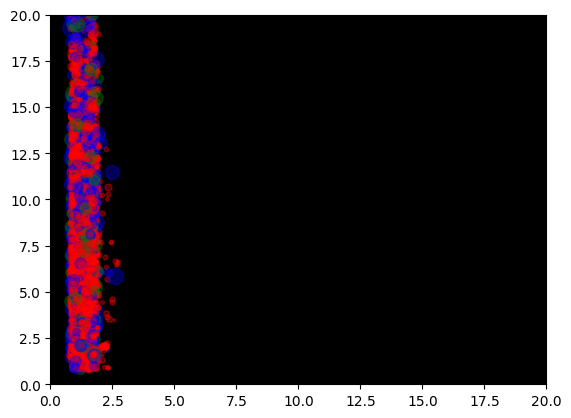

In [5]:
header, data = DataLoad.read_report(report_path[0])
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.8238238238238238, 0.046546546546546545, 0.12962962962962962)

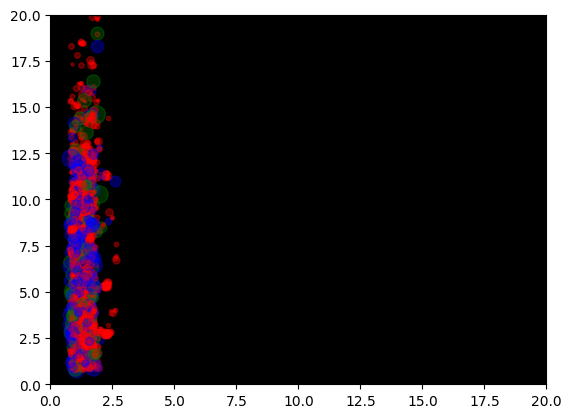

In [6]:
header, data = DataLoad.read_report(report_path[4])
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.559322033898305, 0.06779661016949153, 0.3728813559322034)

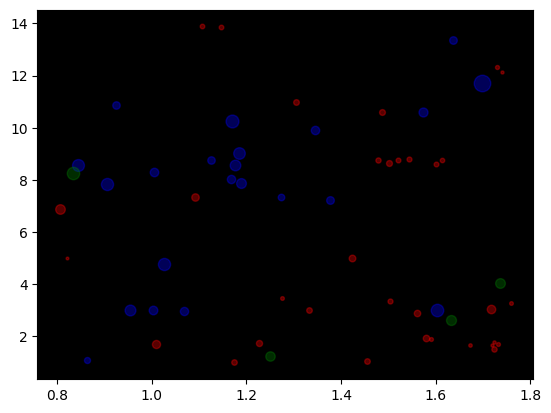

In [7]:
header, data = DataLoad.read_report(report_path[2])
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.6037735849056604, 0.07547169811320754, 0.32075471698113206)

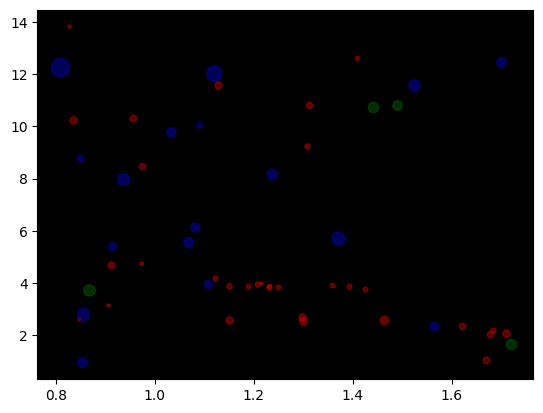

In [8]:
header, data = DataLoad.read_report(report_path[3])
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.4025974025974026, 0.09090909090909091, 0.5064935064935064)

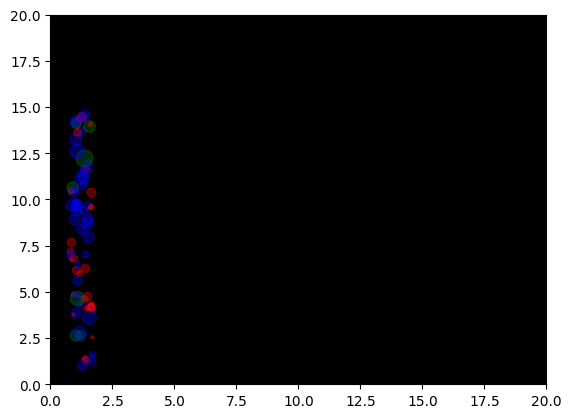

In [14]:
header, data = DataLoad.read_report(report_path[4])
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.90625, 0.0234375, 0.0703125)

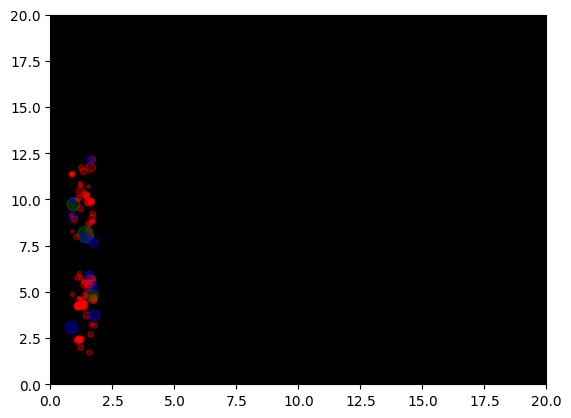

In [13]:
header, data = DataLoad.read_report('./result/20220601field8_5min_IR.csv')
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.8, 0.02, 0.18)

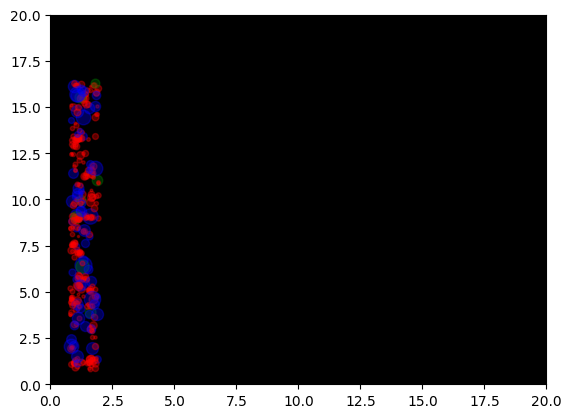

In [20]:
header, data = DataLoad.read_report('./result/20220210field10_5min_IR.csv')
cell_class_map(data, [0,1,2])
ratio_calcul(data)

(0.8319559228650137, 0.0440771349862259, 0.12396694214876033)

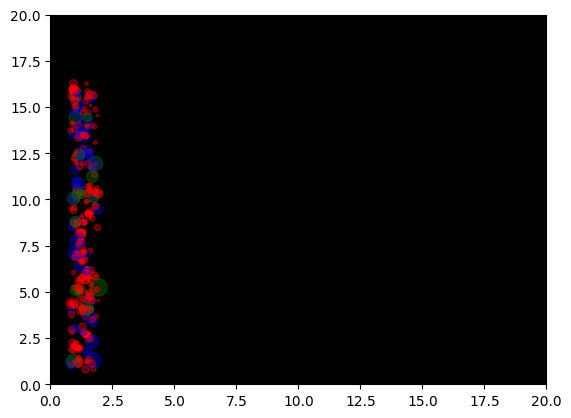

In [19]:
header, data = DataLoad.read_report('./result/20220210field10_30s_IR.csv')
cell_class_map(data, [0,1,2])
ratio_calcul(data)